In [1]:
!pip install kaggle


In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d "vipoooool/new-plant-diseases-dataset"

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:27<00:00, 172MB/s]
100% 2.70G/2.70G [00:27<00:00, 104MB/s]


In [5]:
!unzip '/content/new-plant-diseases-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers  import Concatenate
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from keras.preprocessing import image
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
import urllib.request
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam

In [7]:
image_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

In [8]:
train_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_path = "/content/test"

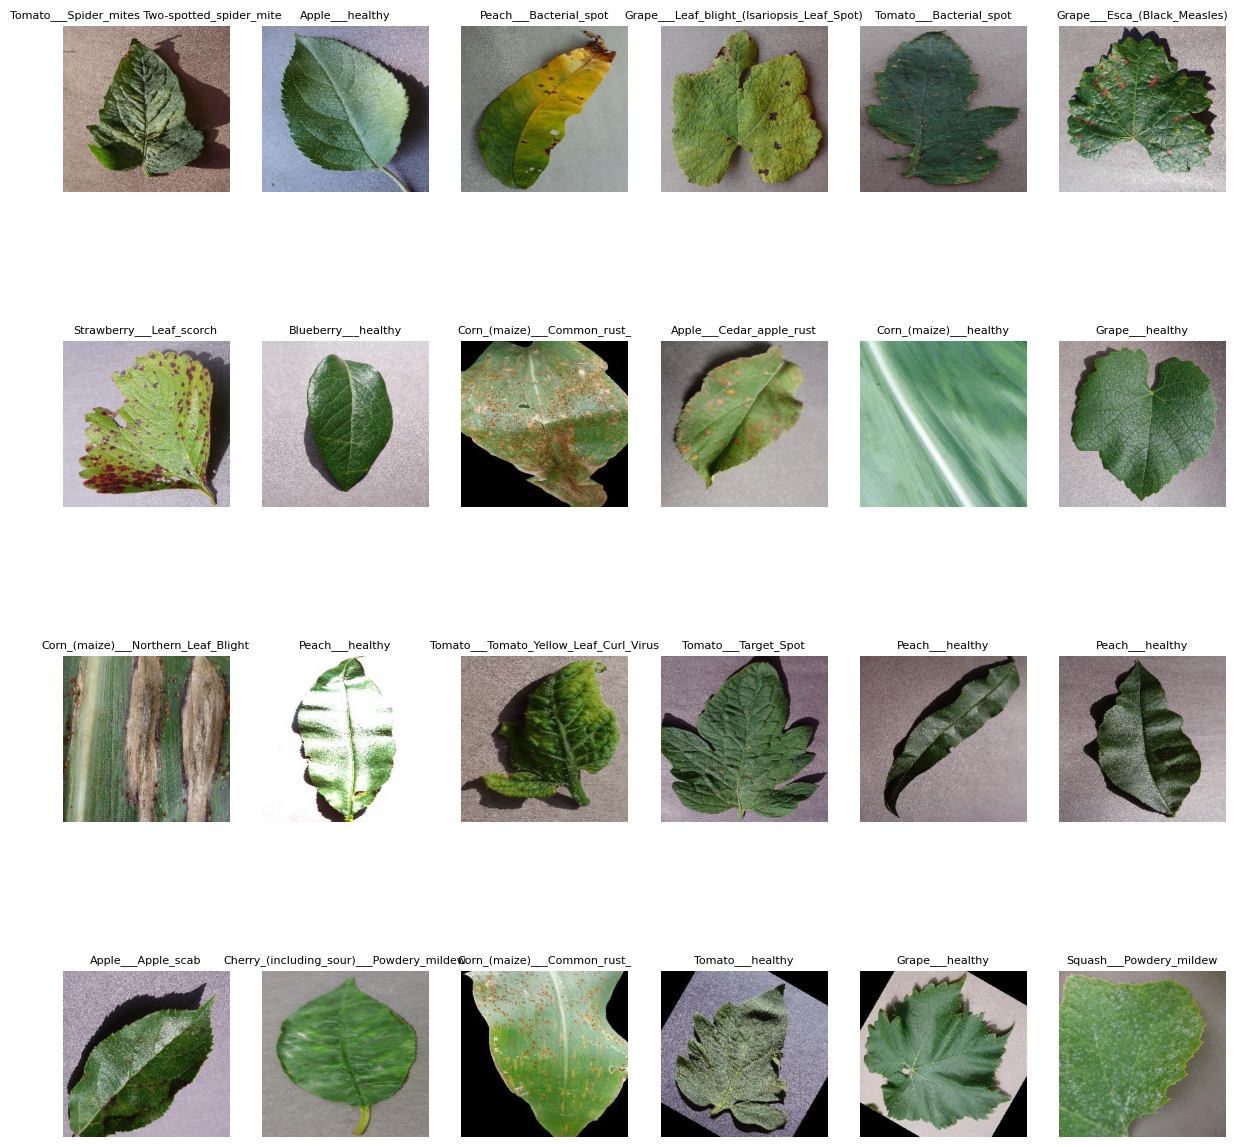

In [12]:
# plt.figure(figsize=(15,15))
# plt.subplots_adjust(wspace=0.1, hspace=0.1)

# for i in range(24):
#     random_folder=np.random.randint(0,len(os.listdir(image_path)))
#     random_folder_path=os.path.join(image_path,os.listdir(image_path)[random_folder])
#     random_image=np.random.randint(0,len(os.listdir(random_folder_path)))
#     random_image_path=os.path.join(random_folder_path,os.listdir(random_folder_path)[random_image])
#     image=cv2.imread(random_image_path)
#     image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#     plt.subplot(4,6,i+1)
#     plt.imshow(image)
#     plt.axis("off")
# plt.show()


plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Get class names (assuming this is a list or generated previously)
class_names = os.listdir(image_path)

for i in range(24):
    random_folder = np.random.randint(0, len(class_names))
    random_folder_path = os.path.join(image_path, class_names[random_folder])

    random_image = np.random.randint(0, len(os.listdir(random_folder_path)))
    random_image_path = os.path.join(random_folder_path, os.listdir(random_folder_path)[random_image])

    # Read and process the image
    image = cv2.imread(random_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot image with label
    plt.subplot(4, 6, i + 1)
    plt.imshow(image)
    plt.title(class_names[random_folder], fontsize=8)  # Display class name as label
    plt.axis("off")

# Save the figure at 600 dpi
plt.savefig('sample_images_with_labels', dpi=600)
plt.show()

In [13]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [14]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [15]:
class_names = os.listdir(image_path)
print(class_names)

['Pepper,_bell___healthy', 'Apple___healthy', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Target_Spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Tomato___Late_blight', 'Blueberry___healthy', 'Apple___Black_rot', 'Tomato___healthy', 'Potato___Early_blight', 'Soybean___healthy', 'Tomato___Early_blight', 'Apple___Cedar_apple_rust', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Grape___Esca_(Black_Measles)', 'Tomato___Bacterial_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Tomato_mosaic_virus', 'Corn_(maize)___Common_rust_', 'Potato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Apple___Apple_scab', 'Grape___Black_rot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___healthy', 'Potato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Strawberry___healthy', 'Peach___Bacterial_spot', 'Cherry_(including_sour)___Powdery_m

In [16]:
print("Number of classes : {}".format(len(class_names)))


Number of classes : 38


In [17]:
number_of_images = {}
for class_name in class_names:
    number_of_images[class_name] = len(os.listdir(image_path+"/"+class_name))

images_each_class = pd.DataFrame(list(number_of_images.items()), columns=['Class Name', 'Number of Images'])

In [ ]:
images_each_class

Class Name  Number of Images
0                                    Tomato___healthy              1926
1                                 Raspberry___healthy              1781
2                         Corn_(maize)___Common_rust_              1907
3                                Tomato___Late_blight              1851
4                                  Tomato___Leaf_Mold              1882
5                             Squash___Powdery_mildew              1736
6                 Corn_(maize)___Northern_Leaf_Blight              1908
7   Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...              1642
8                                  Apple___Apple_scab              2016
9                              Corn_(maize)___healthy              1859
10                               Potato___Late_blight              1939
11                               Strawberry___healthy              1824
12           Cherry_(including_sour)___Powdery_mildew              1683
13                           Strawberry___Leaf_scorch              1774
14           Orange___Haunglongbing_(Citrus_greening)              2010
15                                  Apple___Black_rot              1987
16                       Grape___Esca_(Black_Measles)              1920
17                  Cherry_(including_sour)___healthy              1826
18                               Tomato___Target_Spot              1827
19                            Tomato___Bacterial_spot              1702
20                      Pepper,_bell___Bacterial_spot              1913
21                                  Grape___Black_rot              1888
22                              Tomato___Early_blight              1920
23                             Peach___Bacterial_spot              1838
24                           Apple___Cedar_apple_rust              1760
25      Tomato___Spider_mites Two-spotted_spider_mite              1741
26             Tomato___Tomato_Yellow_Leaf_Curl_Virus              1961
27                                Blueberry___healthy              1816
28         Grape___Leaf_blight_(Isariopsis_Leaf_Spot)              1722
29                       Tomato___Tomato_mosaic_virus              1790
30                                    Grape___healthy              1692
31                        Tomato___Septoria_leaf_spot              1745
32                             Pepper,_bell___healthy              1988
33                              Potato___Early_blight              1939
34                                   Potato___healthy              1824
35                                    Peach___healthy              1728
36                                    Apple___healthy              2008
37                                  Soybean___healthy              2022

<ipython-input-18-5265a1f170c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Class Name', x='Number of Images', data=images_each_class,palette="tab20")


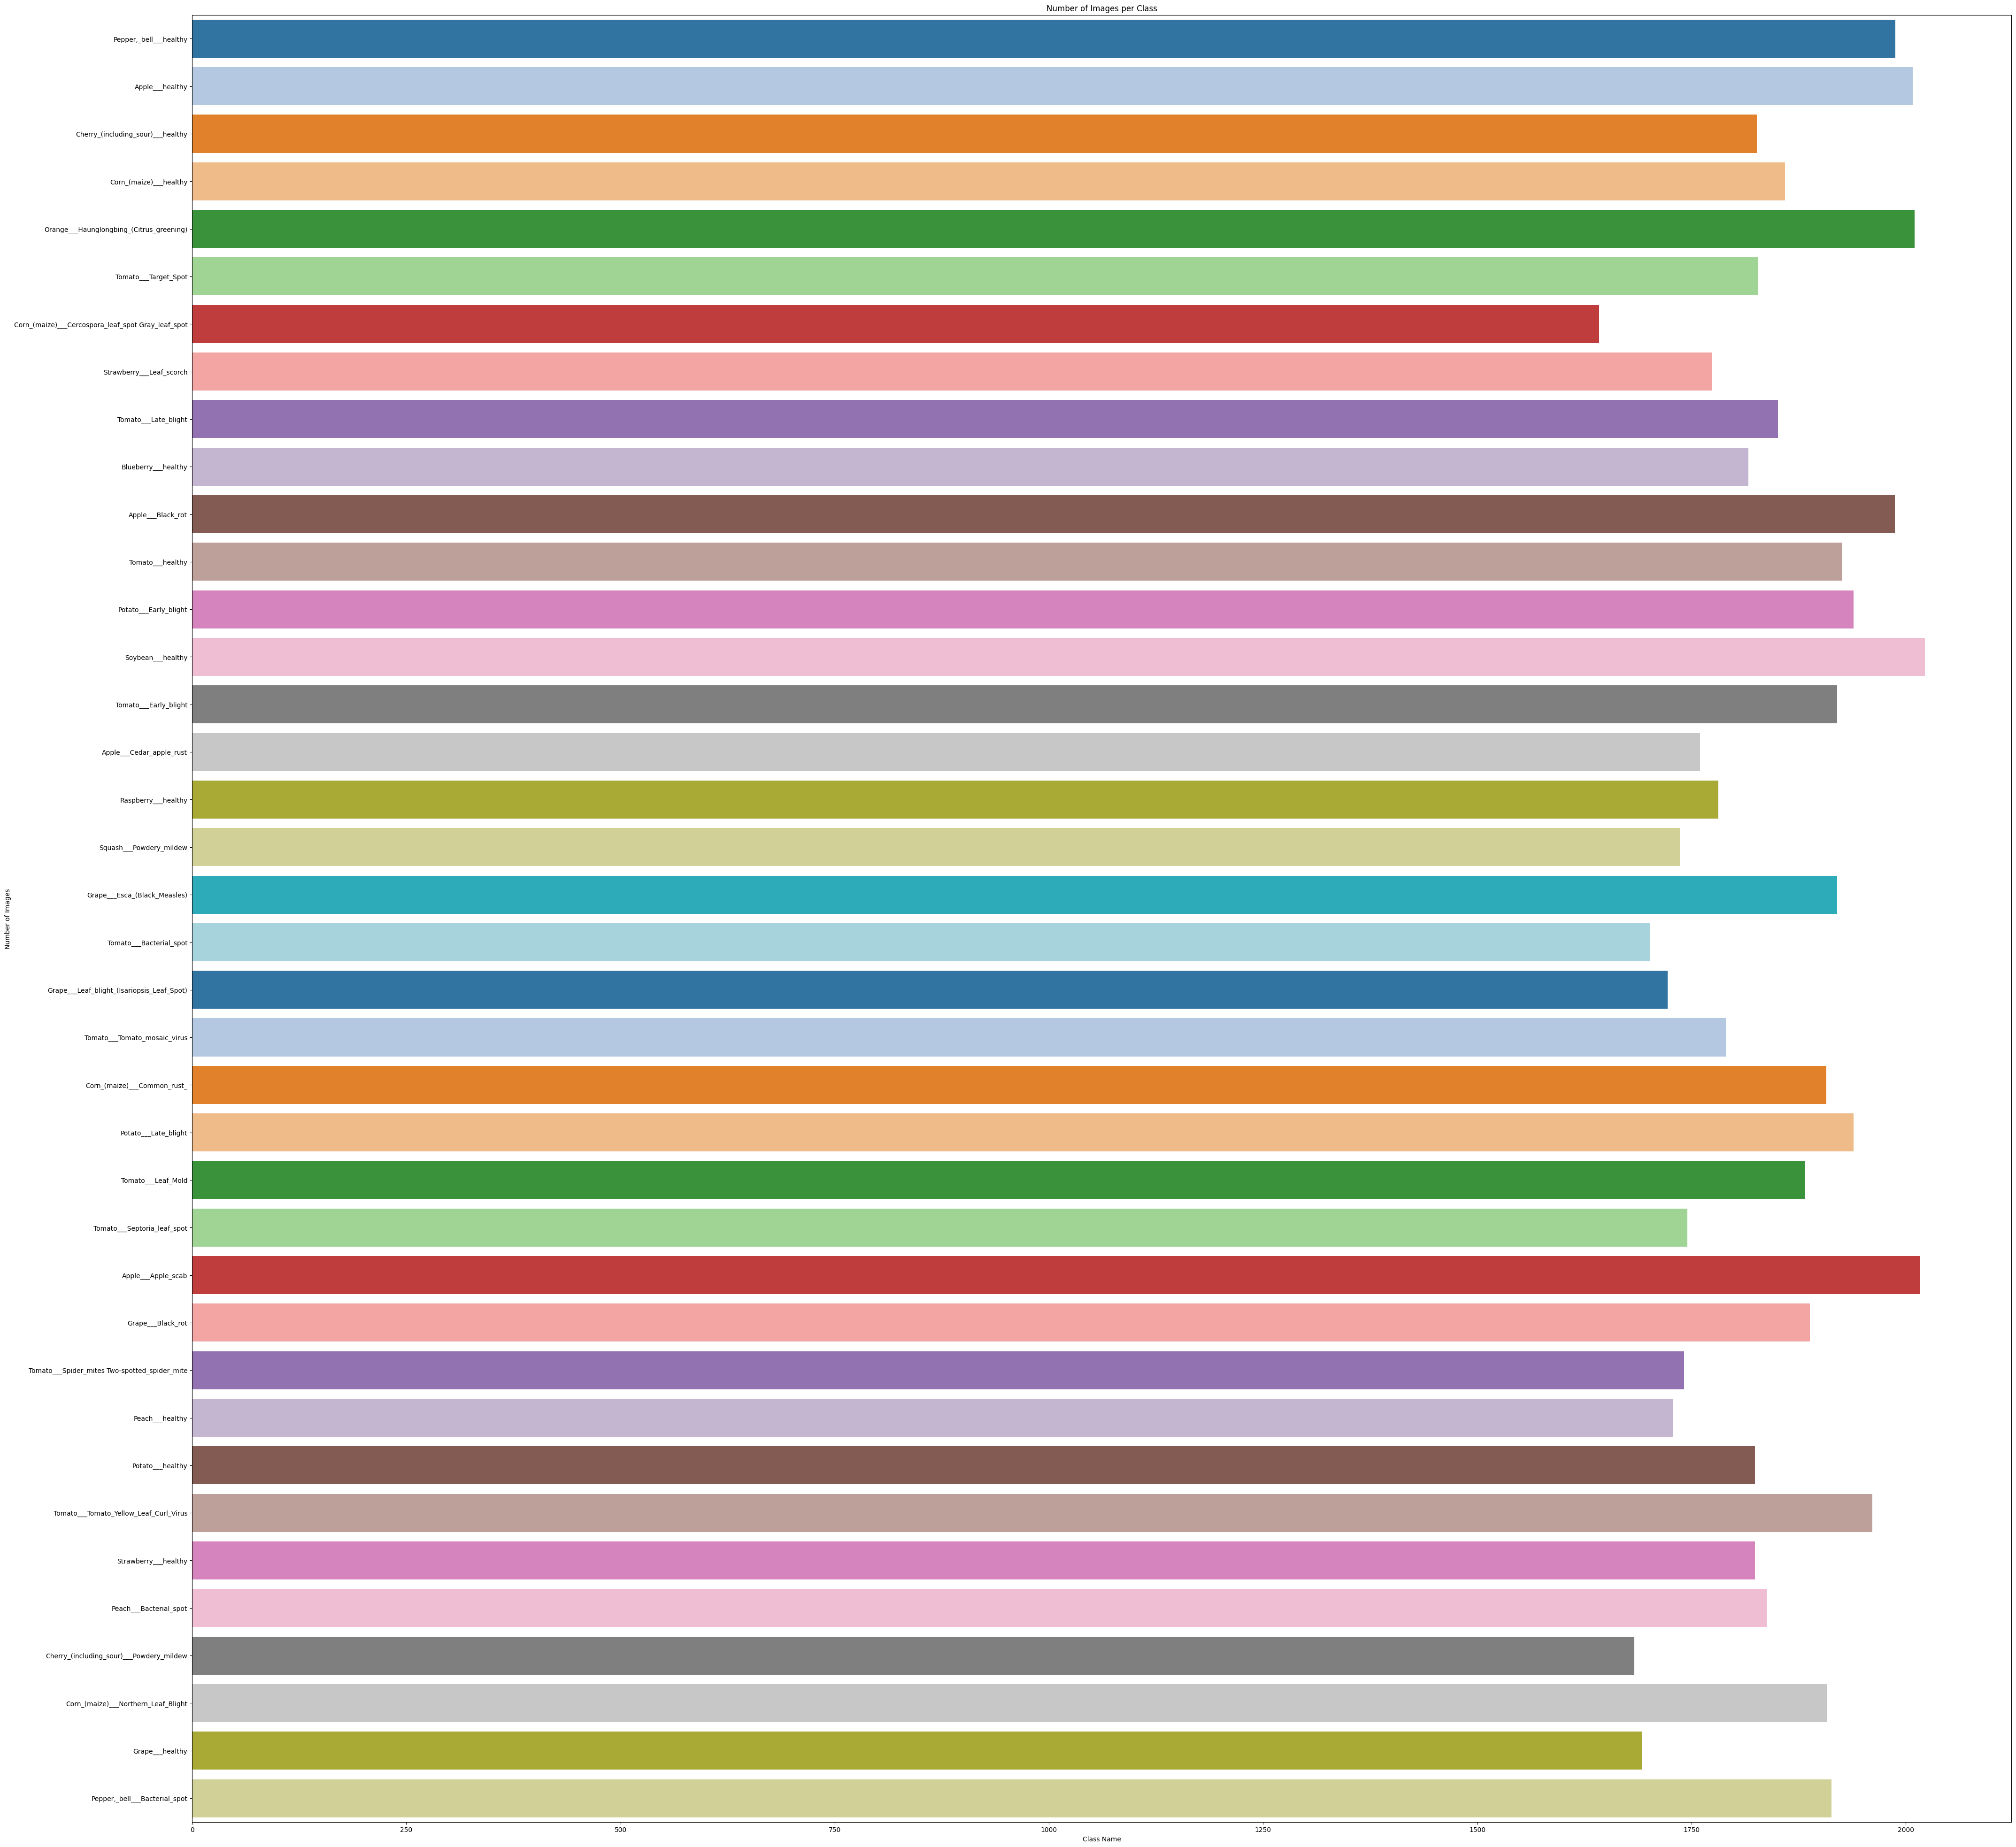

In [18]:
plt.figure(figsize=(50,50))
sns.barplot(y='Class Name', x='Number of Images', data=images_each_class,palette="tab20")
plt.title('Number of Images per Class')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.show()

##Data Augmentation

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data augmentation generator on the training data
training_set = data_augmentation.flow_from_directory(
    train_path,
    target_size=(128, 128),  # Same as your input size
    batch_size=32,
    class_mode='categorical'
)

# To see how many features will be used in the model
# Assuming the image size is (128, 128, 3)
image_shape = (128, 128, 3)  # Height, Width, Channels
num_features = np.prod(image_shape)  # Total number of features
print("Number of features used in the model:", num_features)


Found 70295 images belonging to 38 classes.
Number of features used in the model: 49152


In [ ]:
# cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
# cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
# cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
# cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [ ]:
# cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
# cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
# cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
# cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [ ]:
# cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:

# cnn.add(tf.keras.layers.Flatten())

In [ ]:
# cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
# cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [ ]:
#Output Layer
# cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [ ]:
# cnn.compile(optimizer=Adam learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

# cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
cnn = tf.keras.models.Sequential()

# Define the first block
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Define the second block
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Define the third block
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Define the fourth block
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Define the fifth block
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Add Dropout layer
cnn.add(tf.keras.layers.Dropout(0.25))

# Flatten the output
cnn.add(tf.keras.layers.Flatten())

# Define the fully connected layers
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(tf.keras.layers.Dense(units=38, activation='softmax'))

# # Compile the model
# cnn.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
cnn.summary()

# Save the last convolutional layer for Grad-CAM later
last_conv_layer_name = 'conv2d_9'  # Adjust this name based on your final Conv2D layer


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
# List to store the names of all Conv2D layers
conv_layers = []

# Iterate through the model's layers and filter for Conv2D layers
for layer in cnn.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):
        conv_layers.append(layer.name)

# Print all Conv2D layer names
print("Conv2D Layers in the Model:")
for layer_name in conv_layers:
    print(layer_name)


Conv2D Layers in the Model:
conv2d_44
conv2d_45
conv2d_46
conv2d_47
conv2d_48
conv2d_49
conv2d_50
conv2d_51
conv2d_52
conv2d_53


In [86]:
# Compile the model
cnn.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 454s 199ms/step - accuracy: 0.2800 - loss: 2.5541 - val_accuracy: 0.7715 - val_loss: 0.7091
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 398s 181ms/step - accuracy: 0.7583 - loss: 0.7713 - val_accuracy: 0.8741 - val_loss: 0.3829
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 442s 181ms/step - accuracy: 0.8632 - loss: 0.4300 - val_accuracy: 0.9252 - val_loss: 0.2211
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 391s 178ms/step - accuracy: 0.9010 - loss: 0.3069 - val_accuracy: 0.9489 - val_loss: 0.1535
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 407s 185ms/step - accuracy: 0.9219 - loss: 0.2430 - val_accuracy: 0.9417 - val_loss: 0.1817
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 395s 179ms/step - accuracy: 0.9343 - loss: 0.2040 - val_accuracy: 0.9564 - val_loss: 0.1378
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 395s 179ms/step - accuracy: 0.9432 - loss: 0.1742 - val_accuracy: 0.9550 - val_loss: 0.1317
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 446s 181ms/step - accuracy: 0.9

In [26]:

#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 371s 169ms/step - accuracy: 0.9699 - loss: 0.0926
Training accuracy: 0.9686179757118225


In [27]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9586 - loss: 0.1405
Validation accuracy: 0.9566355347633362


In [28]:
cnn.save('trained_plant_disease_model.keras')


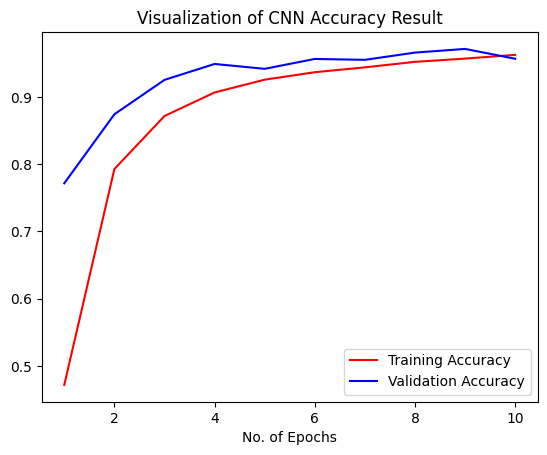

In [30]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of CNN Accuracy Result')
plt.legend()
plt.savefig('Accuracy_CNN',dpi=900)
plt.show()

In [31]:
class_name = validation_set.class_names

In [32]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [33]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step


In [34]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [35]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [36]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [38]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.96      0.98       504
                                 Apple___Black_rot       0.87      1.00      0.93       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.92      0.97      0.94       502
                               Blueberry___healthy       0.99      0.93      0.96       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.94      0.97       421
                 Cherry_(including_sour)___healthy       0.89      0.98      0.93       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.98      0.96       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.99      0.96      0.

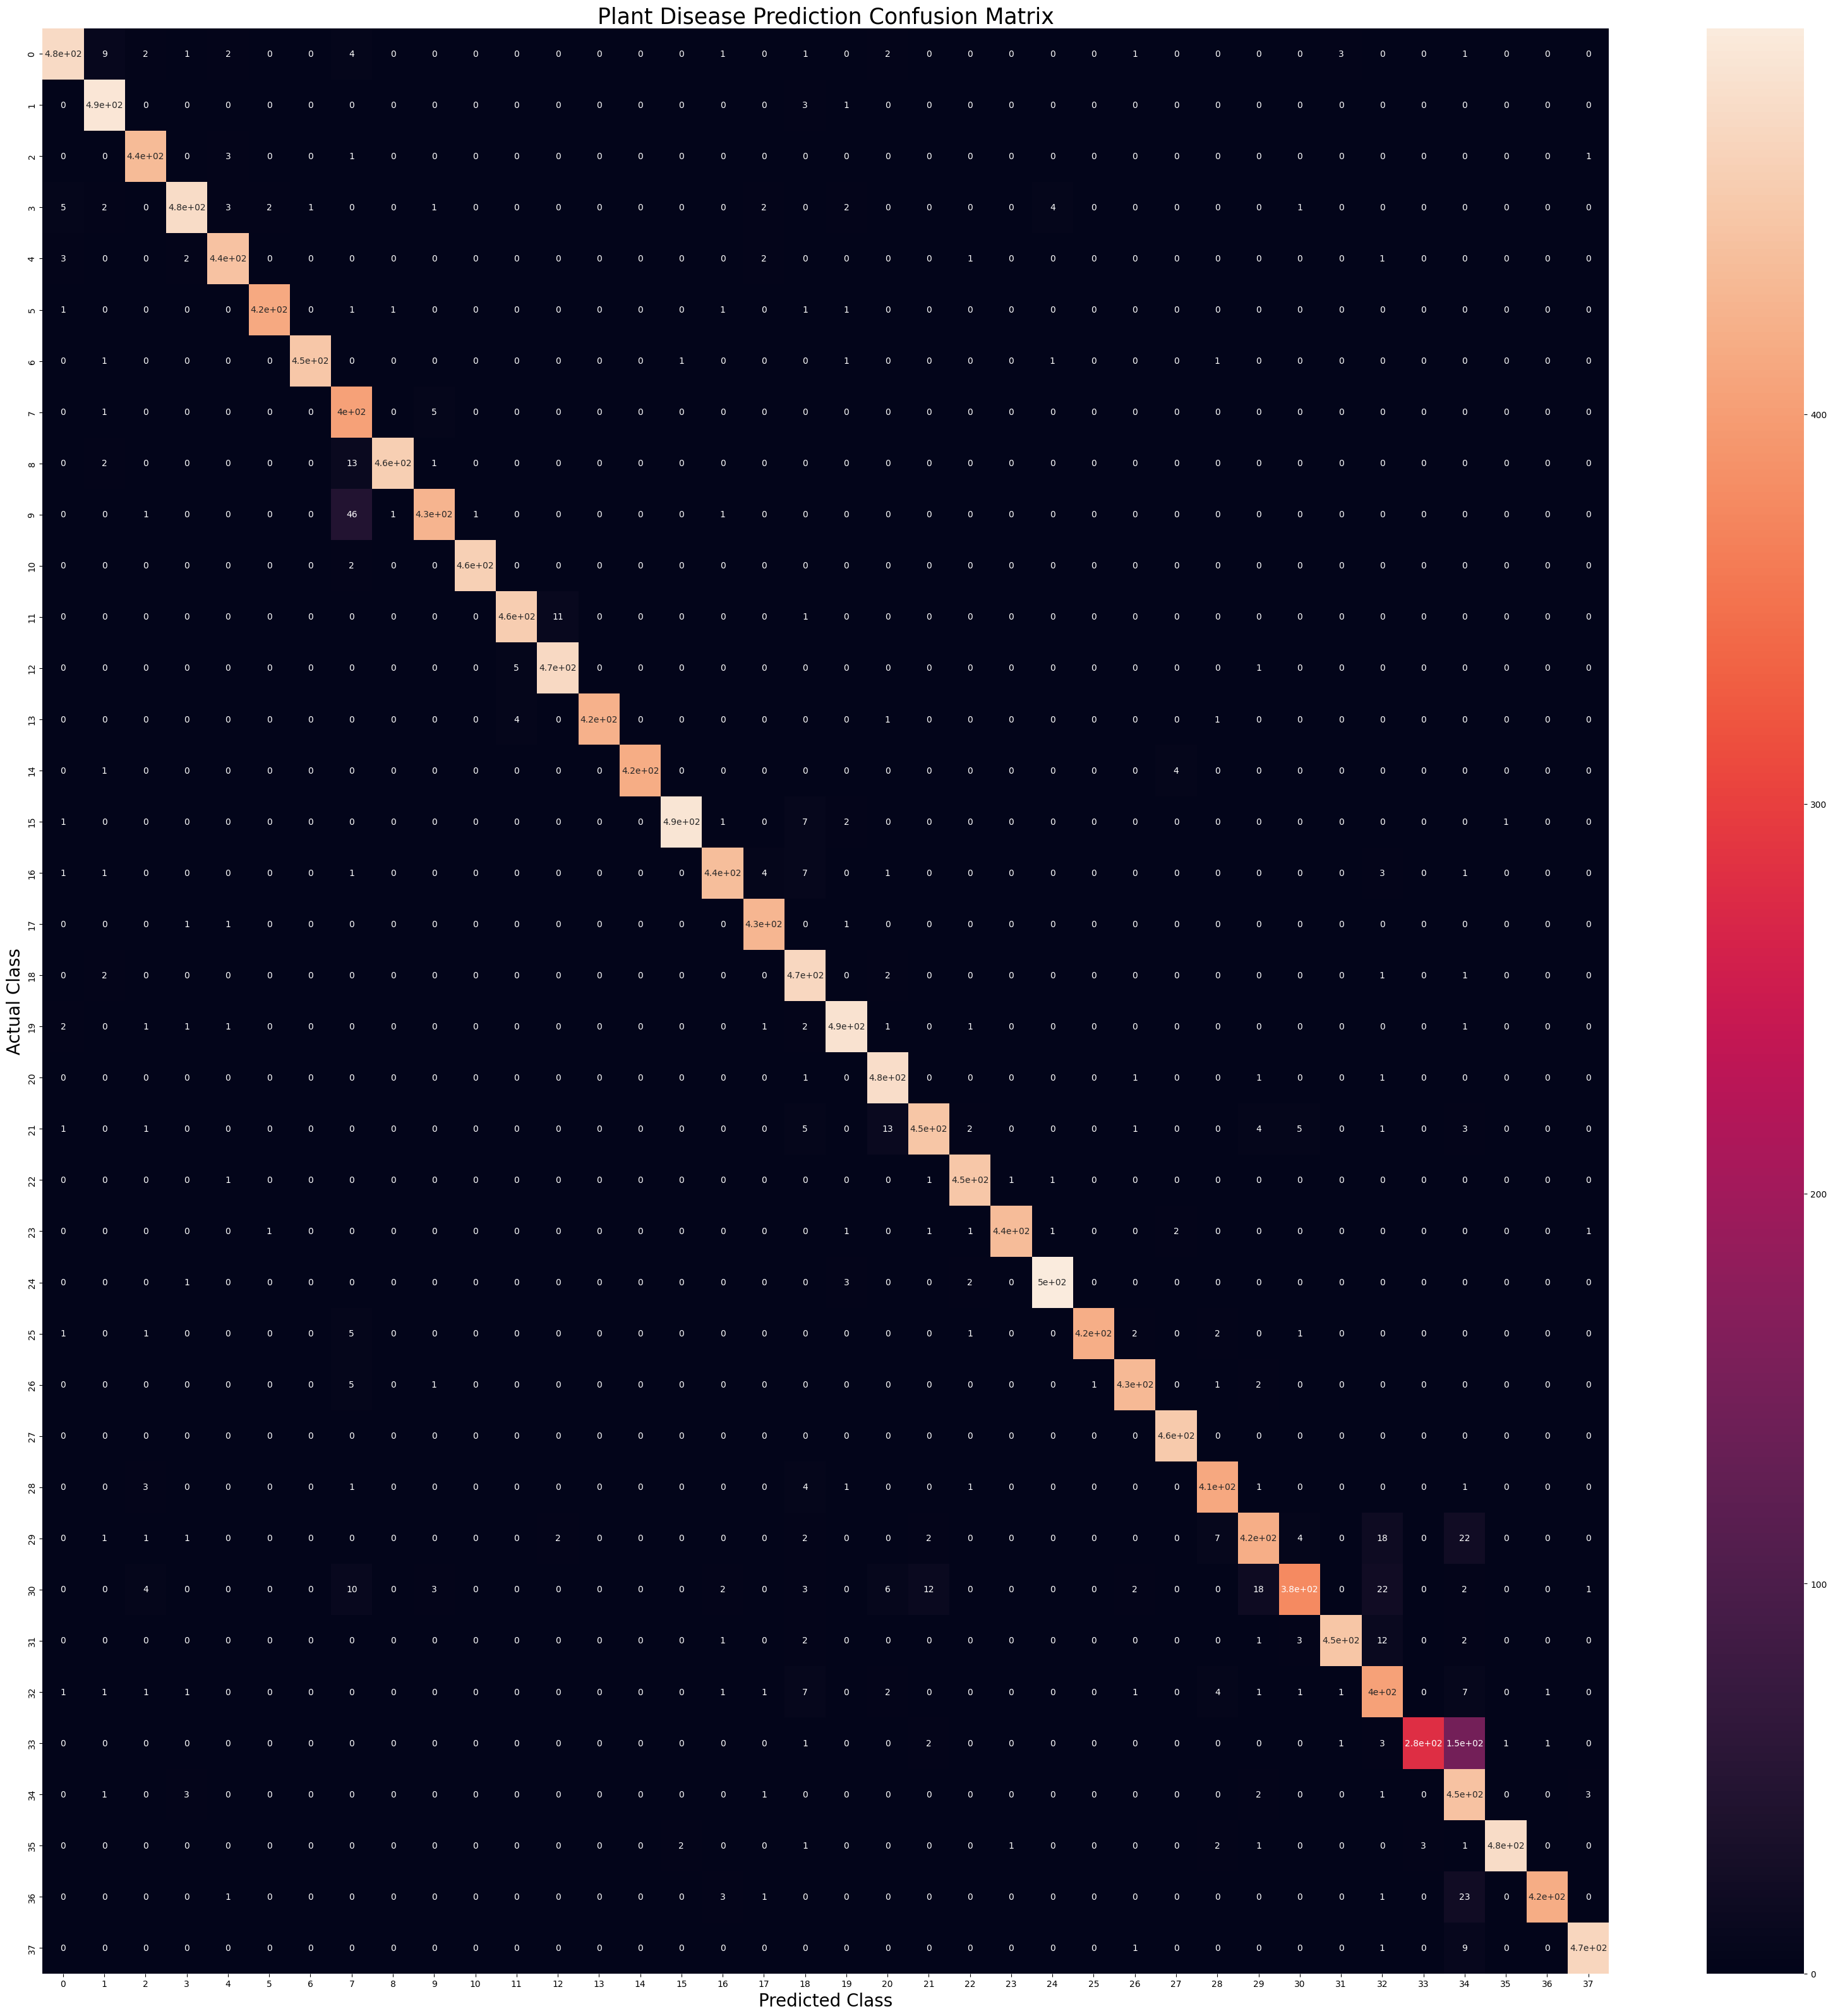

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [39]:
##Plotting the curves
# Get true labels and predicted probabilities
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

num_classes = len(class_name)
# True labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Convert true labels to one-hot encoding for multiclass ROC
Y_true_one_hot = label_binarize(Y_true, classes=range(num_classes))

# ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_true_one_hot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot ROC curve for each class
# plt.figure(figsize=(10, 7))
# for i in range(num_classes):
#     plt.plot(fpr[i], tpr[i], label=f"Class {class_name[i]} (AUC = {roc_auc[i]:.2f})")
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Multiclass ROC Curve')
# plt.legend(loc="lower right")
# plt.show()

# # Precision-Recall Curve for each class
# precision = dict()
# recall = dict()
# prc_auc = dict()
# for i in range(num_classes):
#     precision[i], recall[i], _ = precision_recall_curve(Y_true_one_hot[:, i], y_pred[:, i])
#     prc_auc[i] = auc(recall[i], precision[i])

# # Plot Precision-Recall curve for each class
# plt.figure(figsize=(10, 7))
# for i in range(num_classes):
#     plt.plot(recall[i], precision[i], label=f"Class {class_name[i]} (AUC = {prc_auc[i]:.2f})")
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Multiclass Precision-Recall Curve')
# plt.legend(loc="lower left")
# plt.show()

# Print classification report for detailed metrics
print(classification_report(Y_true, predicted_categories, target_names=class_name))


17572/17572 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.96      0.98       504
                                 Apple___Black_rot       0.87      1.00      0.93       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.92      0.97      0.94       502
                               Blueberry___healthy       0.99      0.93      0.96       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.94      0.97       421
                 Cherry_(including_sour)___healthy       0.89      0.98      0.93       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.98      0.96       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Nor

In [ ]:
# # ROC Curve for each class with improved layout
# plt.figure(figsize=(12, 9))  # Increase figure size for more space

# for i in range(num_classes):
#     plt.plot(fpr[i], tpr[i], label=f"Class {class_name[i]} (AUC = {roc_auc[i]:.2f})")

# plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=14)
# plt.ylabel('True Positive Rate', fontsize=14)
# plt.title('Multiclass ROC Curve', fontsize=16)

# # Adjust legend to prevent overlap
# plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)  # Puts legend outside the plot
# plt.tight_layout()  # Adjusts the plot to fit within the figure size
# plt.show()

# # Precision-Recall Curve for each class with improved layout
# plt.figure(figsize=(12, 9))  # Increase figure size for more space

# for i in range(num_classes):
#     plt.plot(recall[i], precision[i], label=f"Class {class_name[i]} (AUC = {prc_auc[i]:.2f})")

# plt.xlabel('Recall', fontsize=14)
# plt.ylabel('Precision', fontsize=14)
# plt.title('Multiclass Precision-Recall Curve', fontsize=16)

# # Adjust legend to prevent overlap
# plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)  # Puts legend outside the plot
# plt.tight_layout()  # Adjusts the plot to fit within the figure size
# plt.show()


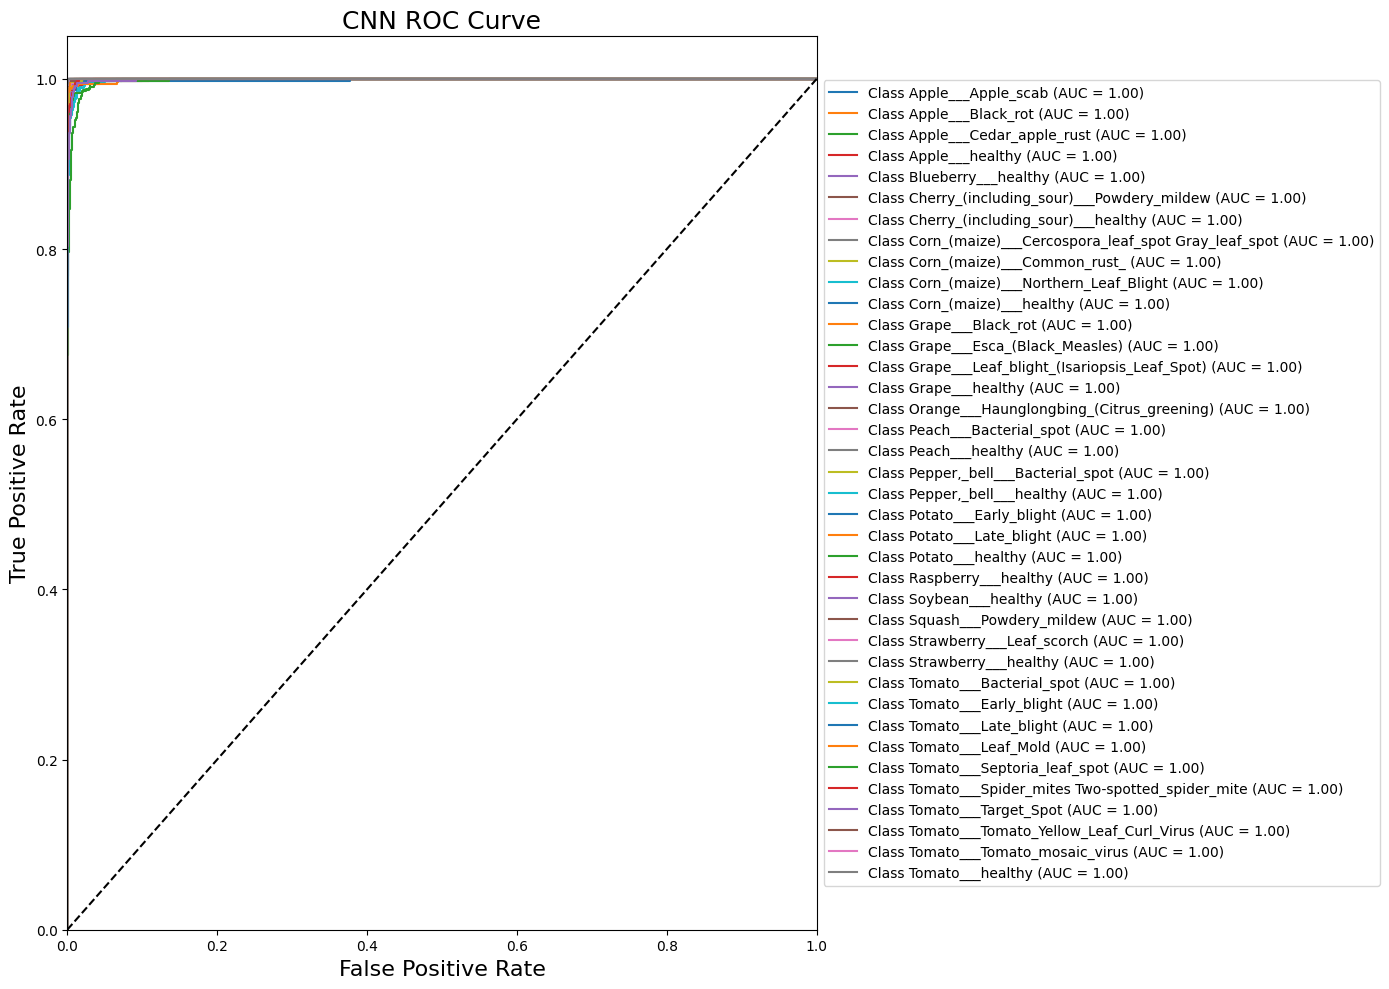

In [40]:
# ROC Curve for each class with smaller legend text and larger plot
plt.figure(figsize=(14, 10))  # Increase figure size for more space

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {class_name[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('CNN ROC Curve', fontsize=18)

# Adjust legend to prevent overlap, with smaller text
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)  # Smaller legend text
plt.tight_layout()  # Adjusts the plot to fit within the figure size
plt.savefig('CNN_ROC',dpi=600)
plt.show()




# Precision-Recall Curve for each class with smaller legend text and larger plot

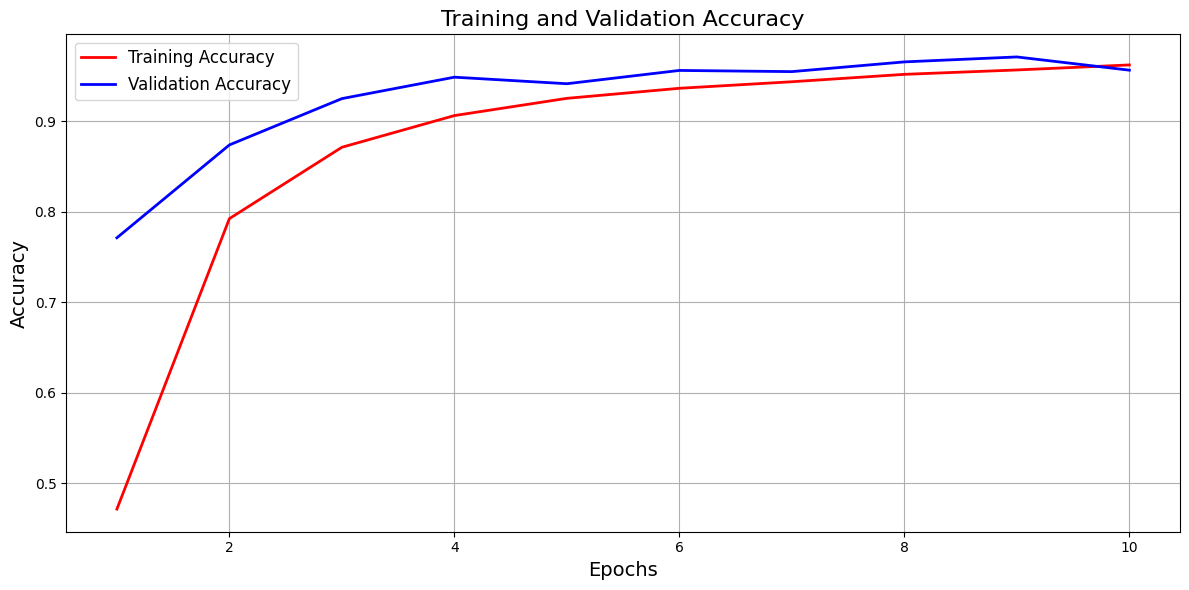

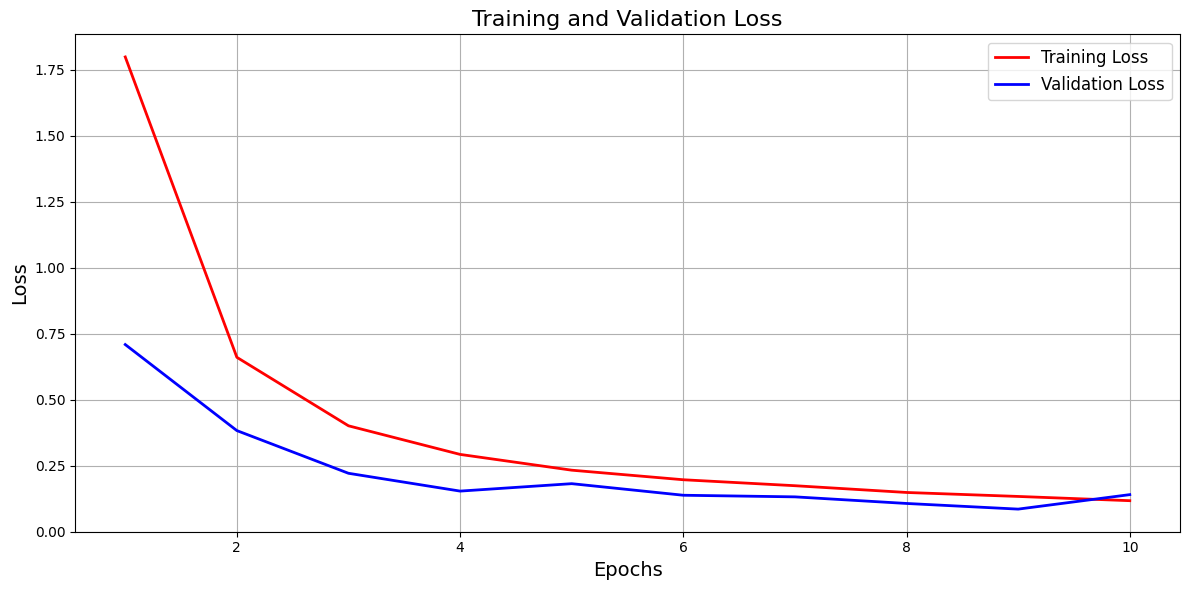

In [41]:
# Assuming training_history contains 'accuracy', 'val_accuracy', 'loss', and 'val_loss'
epochs = range(1, len(training_history.history['accuracy']) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, training_history.history['accuracy'], 'r', label='Training Accuracy', linewidth=2)
plt.plot(epochs, training_history.history['val_accuracy'], 'b', label='Validation Accuracy', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('Accuracy_CNN',dpi=600)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, training_history.history['loss'], 'r', label='Training Loss', linewidth=2)
plt.plot(epochs, training_history.history['val_loss'], 'b', label='Validation Loss', linewidth=2)
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('Loss_CNN',dpi=600)
plt.show()


In [42]:
# Unfreeze all layers for fine-tuning
for layer in cnn.layers:
    layer.trainable = True

# Recompile with a smaller learning rate for fine-tuning
cnn.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
fine_tune_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=5)

# Evaluate fine-tuned model
fine_tune_train_loss, fine_tune_train_acc = cnn.evaluate(training_set)
fine_tune_val_loss, fine_tune_val_acc = cnn.evaluate(validation_set)
print(f"Fine-tuned Training Accuracy: {fine_tune_train_acc}")
print(f"Fine-tuned Validation Accuracy: {fine_tune_val_acc}")


Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 404s 181ms/step - accuracy: 0.9851 - loss: 0.0450 - val_accuracy: 0.9883 - val_loss: 0.0369
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 440s 181ms/step - accuracy: 0.9889 - loss: 0.0324 - val_accuracy: 0.9906 - val_loss: 0.0292
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 403s 183ms/step - accuracy: 0.9899 - loss: 0.0294 - val_accuracy: 0.9901 - val_loss: 0.0316
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 395s 179ms/step - accuracy: 0.9904 - loss: 0.0271 - val_accuracy: 0.9892 - val_loss: 0.0317
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 448s 182ms/step - accuracy: 0.9912 - loss: 0.0253 - val_accuracy: 0.9924 - val_loss: 0.0236
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 359s 163ms/step - accuracy: 0.9943 - loss: 0.0166
550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9928 - loss: 0.0238
Fine-tuned Training Accuracy: 0.994423508644104
Fine-tuned Validation Accuracy: 0.9923742413520813


In [43]:
cnn.save("CNN_Model.h5")

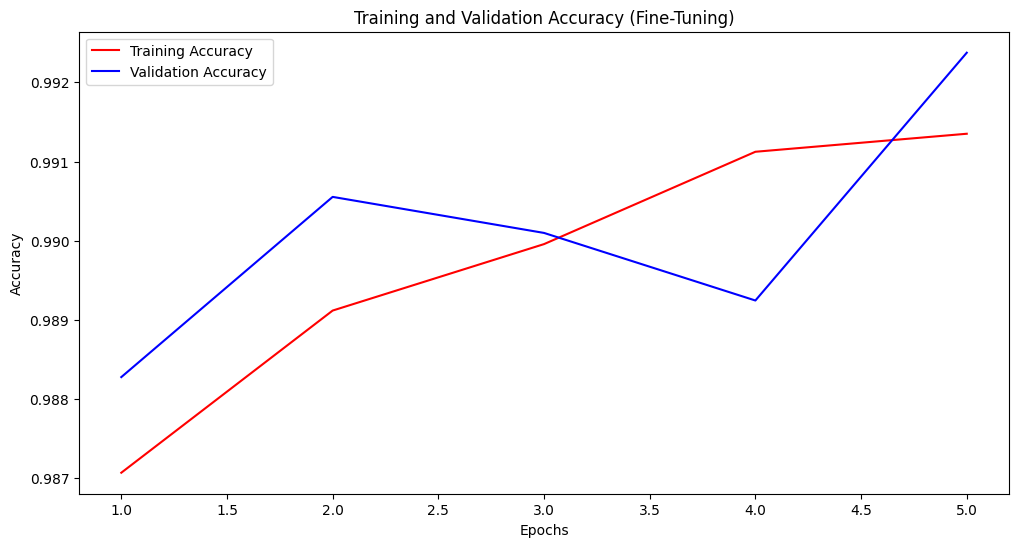

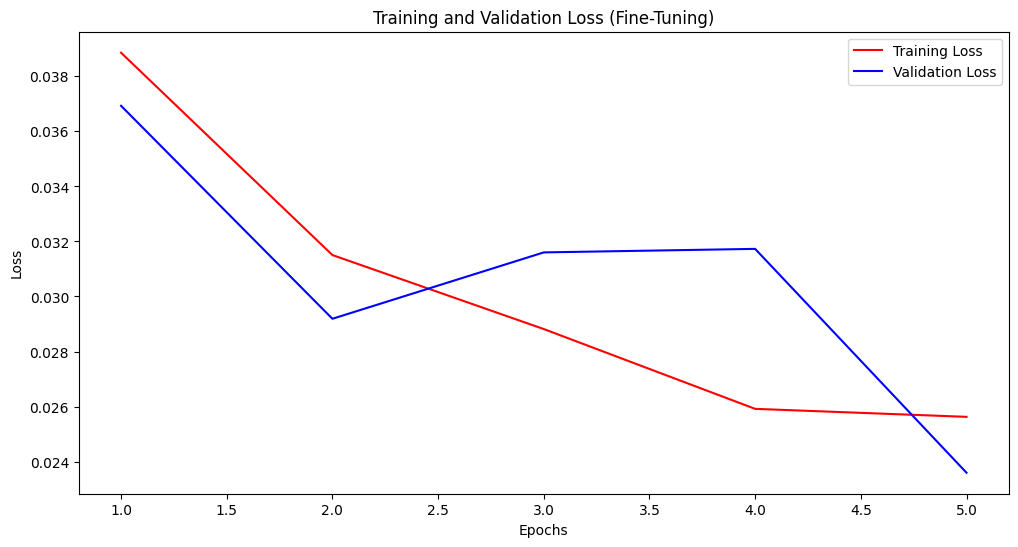

In [44]:
# Extract accuracy and loss from the fine-tuning history
epochs_range = range(1, 6)  # 5 epochs of fine-tuning
acc = fine_tune_history.history['accuracy']
val_acc = fine_tune_history.history['val_accuracy']
loss = fine_tune_history.history['loss']
val_loss = fine_tune_history.history['val_loss']

# Plot fine-tuning accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, acc, 'r', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Fine-Tuning)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Accuracy_CNN_Fine_Tuning',dpi=900)
plt.show()

# Plot fine-tuning loss
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, loss, 'r', label='Training Loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss (Fine-Tuning)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Loss_CNN_Fine_Tuning',dpi=900)
plt.show()

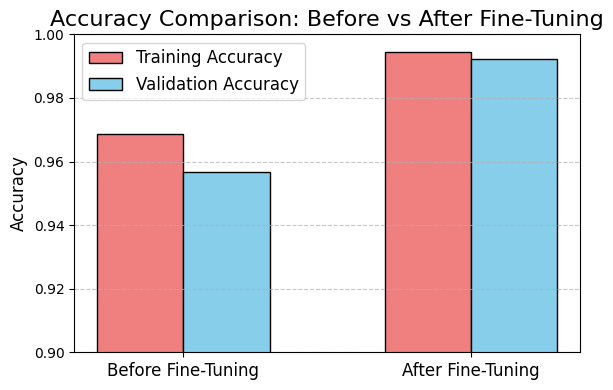

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values before and after fine-tuning
accuracy_values = [0.96861, 0.99442]  # Replace with actual training accuracy if needed
val_accuracy_values = [0.9567, 0.9923]  # Replace with actual validation accuracy if needed

# Labels for the bars
labels = ['Before Fine-Tuning', 'After Fine-Tuning']

# Set up the x locations
x = np.arange(len(labels))

# Create a figure with a smaller size
plt.figure(figsize=(6, 4))

# Training Accuracy bars with a smaller width
plt.bar(x - 0.15, accuracy_values, width=0.3, label='Training Accuracy', color='lightcoral', edgecolor='black')

# Validation Accuracy bars with a smaller width
plt.bar(x + 0.15, val_accuracy_values, width=0.3, label='Validation Accuracy', color='skyblue', edgecolor='black')

# Adding title and labels with enhanced font sizes
plt.title('Accuracy Comparison: Before vs After Fine-Tuning', fontsize=16)
plt.xticks(x, labels, fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.9, 1.0)  # Adjust this range as per your accuracy

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding legend
plt.legend(fontsize=12)

# Save the figure at 600 dpi
plt.savefig('Accuracy_Comparison_Fine_Tuning.png', dpi=600, bbox_inches='tight')

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [46]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

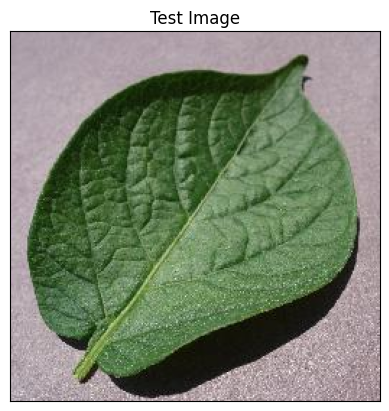

In [47]:
#Test Image Visualization
import cv2
image_path = '/content/test/test/PotatoHealthy2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [48]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


In [49]:
print(predictions)

[[3.2921335e-12 4.4323325e-08 3.8370197e-12 4.0891694e-09 9.9206711e-12
  1.4044241e-10 3.2012933e-05 3.6751103e-14 2.1665159e-13 2.9299249e-14
  9.9588090e-13 4.4462135e-14 9.7805106e-12 8.6113596e-15 8.1748025e-13
  4.2396264e-12 2.0992808e-11 6.2262834e-11 2.2495970e-08 1.8926307e-03
  1.5861154e-13 6.7256572e-08 9.9807382e-01 4.2812276e-10 1.4355397e-06
  8.6930713e-17 1.8920109e-15 1.1881490e-10 9.5091305e-12 3.6491794e-08
  2.3955649e-12 7.5350034e-13 4.5845444e-10 2.2026766e-11 4.3087611e-10
  4.9733133e-15 1.2182616e-10 3.5830026e-12]]


In [50]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

22


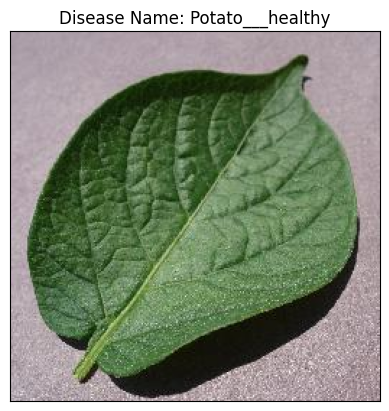

In [51]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [53]:
# Load the test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/test',  # Update with the correct path to your test dataset
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Evaluate the model on the test dataset
test_loss, test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)


Found 33 files belonging to 1 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 730ms/step - accuracy: 0.0919 - loss: 1171.4802
Test accuracy: 0.09090909361839294


In [54]:
# Calculate F1 Score
f1 = f1_score(Y_true, predicted_categories, average='weighted')  # Use 'macro' or 'micro' as needed
print(f"F1 Score: {f1:.4f}")


F1 Score: 0.9565


Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

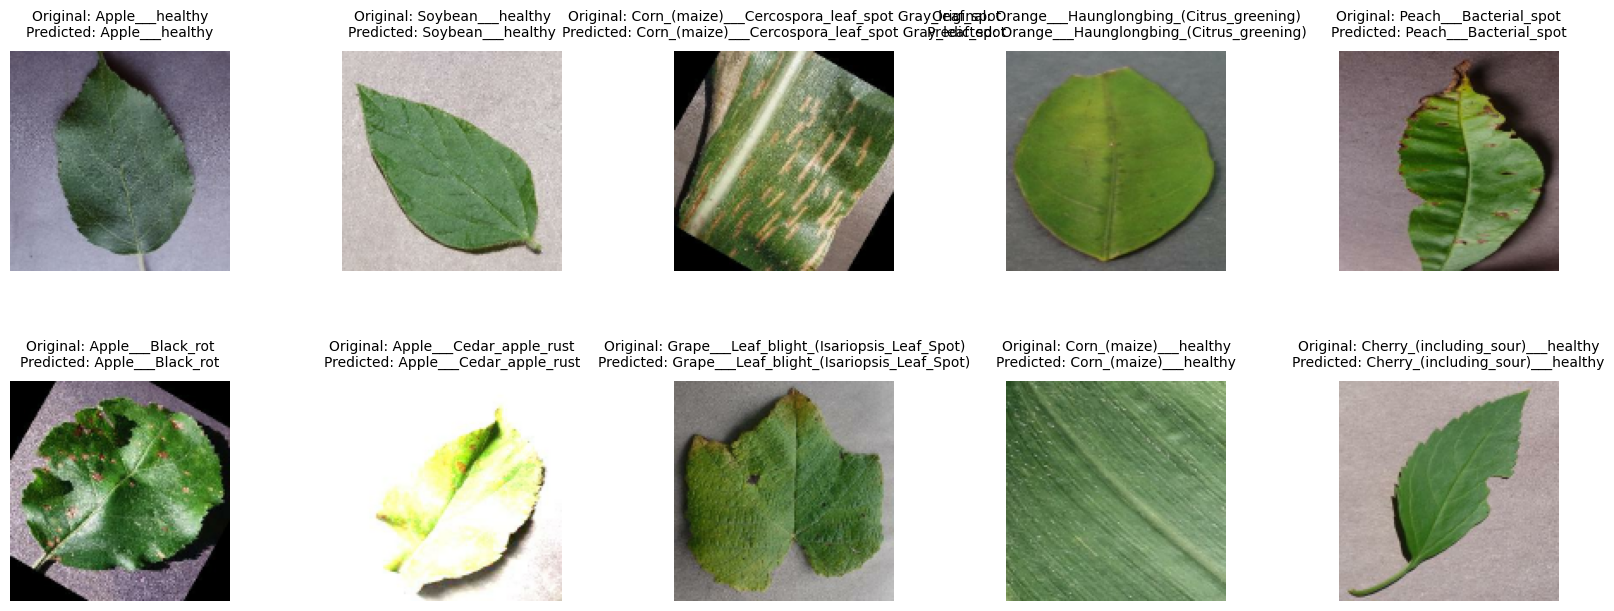

In [55]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the validation dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
)

# Get class names
class_names = validation_set.class_names
print(class_names)

# Get a batch of images and their labels
images, labels = validation_set.as_numpy_iterator().next()

# Make predictions on the batch
predictions = cnn.predict(images)

# Get the predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get the original class indices
original_classes = np.argmax(labels, axis=1)

# Plot 10 images with their original and predicted labels
num_images = 10
plt.figure(figsize=(20, 20))  # Increase figure size for better visibility

for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].astype("uint8"))  # Convert the float values to uint8 for proper visualization
    plt.title(f'Original: {class_names[original_classes[i]]}\nPredicted: {class_names[predicted_classes[i]]}',
              fontsize=10, pad=10)  # Adjust font size to 10 for smaller text
    plt.axis('off')

# Adjust spacing between images
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Increase spacing
plt.savefig('CNN Model Test',dpi=700)
plt.show()


In [63]:
# List to store the names of all Conv2D layers
conv_layers = []

# Iterate through the model's layers and filter for Conv2D layers
for layer in cnn.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):
        conv_layers.append(layer.name)

# Print all Conv2D layer names
print("Conv2D Layers in the Model:")
for layer_name in conv_layers:
    print(layer_name)


Conv2D Layers in the Model:
conv2d_10
conv2d_11
conv2d_12
conv2d_13
conv2d_14
conv2d_15
conv2d_16
conv2d_17
conv2d_18
conv2d_19


In [68]:
# Print all layer names
for layer in cnn.layers:
    print(layer.name)


conv2d_10
conv2d_11
max_pooling2d_5
conv2d_12
conv2d_13
max_pooling2d_6
conv2d_14
conv2d_15
max_pooling2d_7
conv2d_16
conv2d_17
max_pooling2d_8
conv2d_18
conv2d_19
max_pooling2d_9
dropout_2
flatten_1
dense_2
dropout_3
dense_3


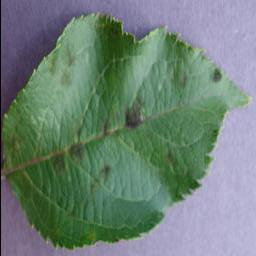

In [87]:
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

model_builder = keras.applications.xception.Xception
img_size = (224, 224)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "con2d_53"

## The local path to our target image

img_path= "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_270deg.JPG"

display(Image(img_path))
def get_img_array(img_path, size):
    ## `img` is a PIL image
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    ## We add a dimension to transform our array into a "batch"
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    ## First, we create a model that maps the input image to the activations
    ## of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    ## Then, we compute the gradient of the top predicted class for our input image
    ## for the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    ## We are doing transfer learning on last layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    ## This is a vector where each entry is the mean intensity of the gradient
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    ## calculates a heatmap highlighting the regions of importance in an image
    ## for a specific
    ## predicted class by combining the output of the last convolutional layer
    ## with the pooled gradients.
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    ## For visualization purpose
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

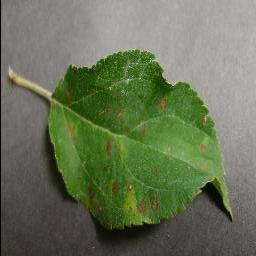

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted class probabilities: [[-9.18032408e-01 -7.67638624e-01  6.35494232e-01 -5.89025259e-01
  -5.99486470e-01  6.03682876e-01 -5.38887262e-01  3.25051993e-01
  -1.57680333e-01  2.35714763e-01 -3.02718639e-01  1.37374294e+00
   4.76770192e-01  9.11492109e-01  1.03933871e+00 -3.50819618e-01
   6.91496849e-01  1.86803430e-01 -4.15132493e-01  1.07661271e+00
   3.01944882e-01 -7.97889829e-01 -3.60079318e-01 -4.08686191e-01
  -1.03413785e+00  1.05523318e-03  9.06297088e-01  8.23198557e-01
   6.57975674e-03  4.56371158e-01 -5.41773081e-01  1.33728099e+00
   1.56640851e+00 -5.56143284e-01  5.04173100e-01  4.24863875e-01
   3.58431071e-01 -9.66016799e-02  1.58870852e+00  6.34046793e-01
   1.85676610e+00 -3.83953452e-01 -8.41517508e-01 -1.61480650e-01
   3.55963171e-01 -3.18625242e-01  1.81085968e+00  3.99455953e+00
  -1.38904977e+00 -1.50245976e+00 -1.20997214e+00  3.50982249e-01
   2.04474360e-01  8.16833258e-01  6.21098161e-01  1.62595892e+00
  -3.5049

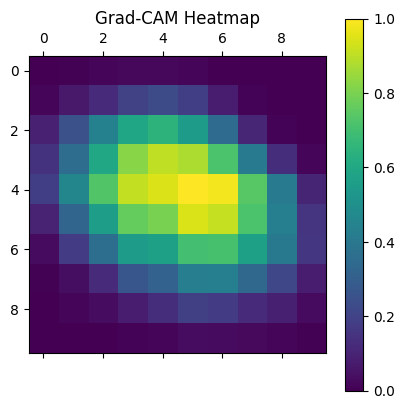

<ipython-input-92-e1b6b6196f0d>:93: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = mpl.cm.get_cmap("jet")


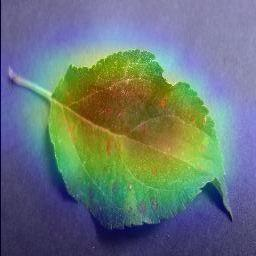

In [92]:
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

# Model parameters
model_builder = keras.applications.xception.Xception
img_size = (299, 299)  # Change to (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

# Define the last convolutional layer name (adjust this based on your model)
last_conv_layer_name = "block14_sepconv2_act"  # Check the correct layer name

# last_conv_layer_name = "con2d_53"

# Local path to the target image
# img_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_270deg.JPG"
img_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Cedar_apple_rust/0321e067-d13b-47d0-b3a6-76ba6f357d02___FREC_C.Rust 3667_270deg.JPG"
# Display the image
display(Image(img_path))

def get_img_array(img_path, size):
    """Load and preprocess image."""
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)  # Add batch dimension
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    """Generate Grad-CAM heatmap."""
    # Create a model that outputs the last conv layer and the predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the top predicted class for the input image
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Mean intensity of the gradient
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Calculate the heatmap
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Preparing the image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Load the pre-trained model
model = model_builder(weights="imagenet")

# Remove last layer's softmax for Grad-CAM
model.layers[-1].activation = None

# Make predictions
preds = model.predict(img_array)
print("Predicted class probabilities:", preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Visualize the heatmap
plt.matshow(heatmap)
plt.title("Grad-CAM Heatmap")
plt.colorbar()
plt.savefig('Grad_CAM',dpi=600)
plt.show()

def save_and_display_gradcam(img_path, heatmap, cam_path="save_cam_image.jpg", alpha=0.4):
    """Superimpose the heatmap on the original image and display it."""
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range of 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on the original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)
    superimposed_img.save(cam_path, dpi=(600, 600))

    # Display Grad-CAM
    display(Image(cam_path))

# Save and display the Grad-CAM result
save_and_display_gradcam(img_path, heatmap)
